# Blogging with IPython and Collapsible Input Cells

I learned about IPython Notebooks from the fantastic blog of [jakevdp](http://jakevdp.github.io/). Realizing what a great way they are to interactivly manipulate Python code and transform the results into web pages, I started playing around with them and the pelican site generator myself. I had a few science questions on my mind for which I thought writing things up with some nice graphical illustrations would clarify things for myself and maybe others. Then I arrived at a point where I had long input boxes in my web pages with Python code that was not very interesting. I just wanted to have some figures for illustration. Of course I could just generate some plots, save them and load them into the Notebook to display them. But that seemed like an unnecessary detour if I already created the plots in the notebook. Could I not just hide the input cells? It turns out the answer was apparently "no".

So I interrupted the process of writing about the original problems that were on my mind and set out to modify the liquid_tags pelican plugin that generates these pages so that the input code cells can be hidden.
<!-- PELICAN_END_SUMMARY -->

Hiding input cells in the IPython Notebook is a feature that is often requested but not implemented yet. Looking at the discussions of the various github issues that discuss this, it is not clear to me that it will ever be available. There are a lot of complications trying to do this right in an interactive notebook. However, the problem should be manageable in static web pages. So I set out to dig into the internals of the liquid_tags pelican plugin. The result is currently in [my fork of the pelican-plugins repository](https://github.com/joergdietrich/pelican-plugins/tree/collapse-code).

I assume you have a basic familiarity with how to blog with pelican and IPython Notebooks. If not, have a look at these ressources first:

* [Jake's blog post on migrating to pelican](http://jakevdp.github.io/blog/2013/05/07/migrating-from-octopress-to-pelican/)
* [themodernscientist's blog post on blogging with notebooks and pelican](http://themodernscientist.com/posts/2013/2013-06-02-my_octopelican_python_blog/)
* [The liquid_tags README](https://github.com/getpelican/pelican-plugins/blob/master/liquid_tags/Readme.md)

My branch comes with a new template file ``pelicanhtml.tpl`` in ``liquid_tags``. To enable code collapsing, you need to copy this to the top level of your blog directory. Collapsible code boxes are then created by adding a comment line to the Python code. These come in two flavors:

1. Boxes that are collapsed on load and can be expanded are created with the comment `# <!-- collapse=True -->`
2. Boxes that are expanded on load and can be collapsed are created with the comment ```# <!-- collapse=False -->```

If no collapse comment is given, the standard input box is created. Note that the pattern above has to match exactly, including the number of whitespaces, since the official release of the [jinja2](http://jinja.pocoo.org/docs/) templating engine does not yet support regular expressions. The collapse comment line is removed during page creation so that it is not visible in the examples below.

Here is an example of a rather long input code box using one of the ``matplotlib`` example programs. This one is collapsed on load:

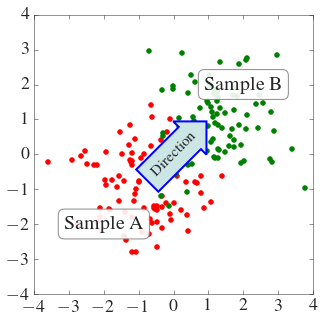

In [1]:
%matplotlib inline

# Example code from matplotlib
# Copyright (c) 2012-2013 Matplotlib Development Team; All Rights Reserved
# <!-- collapse=True -->
import numpy.random
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(5,5))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)

bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.draw()

Here is a shorter code snippet, which is shown on load but can be collapsed:

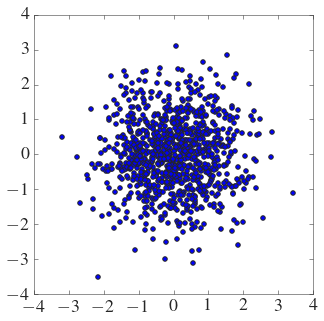

In [2]:
# <!-- collapse=False -->
x = numpy.random.normal(size=1000)
y = numpy.random.normal(size=1000)
fig = plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.draw()

## Further Details on the Implementation

The expand/collapse function is implemented via [jQuery's](http://www.jquery.com/) `.slideToggle()`. To work, this obviously requires that your readers have javascript enabled. This also means that if they don't, they cannot unhide code, which is collapsed on load. JQuery is loaded via https from Google's CDN. If you prefer not to use Google for whatever reason, change line 145 in [`liquid_tags/notebook.py`](https://github.com/joergdietrich/pelican-plugins/blob/collapse-code/liquid_tags/notebook.py). The style of the Collapse/Expand header is defined starting at line 116 in the same file. An exception is the font style of this header, which is defined in the `<span>` tags in lines 27 and 33 of [`liquid_tags/pelicanhtml.tpl`](https://github.com/joergdietrich/pelican-plugins/blob/collapse-code/liquid_tags/pelicanhtml.tpl). The reason is that the code box would otherwise inherit the font properties. It might be cleaner to define the fonts for the header in the CSS and then fix them again the in the CSS for the `input_area`. But this is supposed to be a quick hack and it works.